In [2]:
# source: A beginner’s guide to Linear Regression in Python with Scikit-Learn
# source: https://towardsdatascience.com/a-beginners-guide-to-linear-regression-in-python-with-scikit-learn-83a8f7ae2b4f

# y = mx + b
# m : slope
# b : intercept 

# slope and intercept:
# https://www.khanacademy.org/math/algebra/x2f8bb11595b61c86:forms-of-linear-equations/x2f8bb11595b61c86:intro-to-slope-intercept-form/a/introduction-to-slope-intercept-form


#Import all the required libraries :
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
#import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [7]:
dataset = pd.read_csv('Weather.csv')

In [8]:
len(dataset)

119040

In [9]:
dataset.shape

(119040, 31)

In [10]:
# You should receive output as (119040, 31), 
# which means the data contains 119040 rows and 31 columns.

In [11]:
# To see the statistical details of the dataset, 
# we can use describe():
dataset.describe()

,STA,WindGustSpd,MaxTemp,MinTemp,MeanTemp,YR,MO,DA,DR,SPD,...,FT,FB,FTI,ITH,PGT,SD3,RHX,RHN,RVG,WTE
count,119040.000000,532.000000,119040.000000,119040.000000,119040.000000,119040.000000,119040.000000,119040.000000,533.000000,532.000000,...,0.0,0.0,0.0,0.0,525.000000,0.0,0.0,0.0,0.0,0.0
mean,29659.435795,37.774534,27.045111,17.789511,22.411631,43.805284,6.726016,15.797530,26.998124,20.396617,...,NaN,NaN,NaN,NaN,12.085333,NaN,NaN,NaN,NaN,NaN
std,20953.209402,10.297808,8.717817,8.334572,8.297982,1.136718,3.425561,8.794541,15.221732,5.560371,...,NaN,NaN,NaN,NaN,5.731328,NaN,NaN,NaN,NaN,NaN
min,10001.000000,18.520000,-33.333333,-38.333333,-35.555556,40.000000,1.000000,1.000000,2.000000,10.000000,...,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
25%,11801.000000,29.632000,25.555556,15.000000,20.555556,43.000000,4.000000,8.000000,11.000000,16.000000,...,NaN,NaN,NaN,NaN,8.500000,NaN,NaN,NaN,NaN,NaN
50%,22508.000000,37.040000,29.444444,21.111111,25.555556,44.000000,7.000000,16.000000,32.000000,20.000000,...,NaN,NaN,NaN,NaN,11.600000,NaN,NaN,NaN,NaN,NaN
75%,33501.000000,43.059000,31.666667,23.333333,27.222222,45.000000,10.000000,23.000000,34.000000,23.250000,...,NaN,NaN,NaN,NaN,15.000000,NaN,NaN,NaN,NaN,NaN
max,82506.000000,75.932000,50.000000,34.444444,40.000000,45.000000,12.000000,31.000000,78.000000,41.000000,...,NaN,NaN,NaN,NaN,23.900000,NaN,NaN,NaN,NaN,NaN


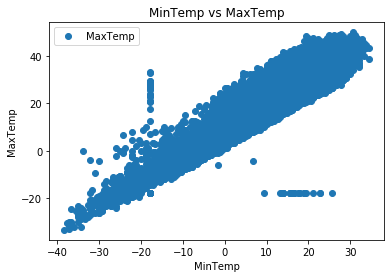

In [12]:
# And finally, let’s plot our data points on a 
# 2-D graph to eyeball our dataset and see if 
# we can manually find any relationship between 
# the data using the below script :
dataset.plot(x='MinTemp', y='MaxTemp', style='o')  
plt.title('MinTemp vs MaxTemp')  
plt.xlabel('MinTemp')  
plt.ylabel('MaxTemp')  
plt.show()

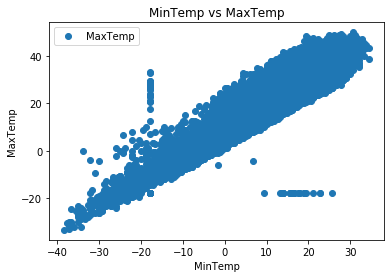

In [13]:
# We have taken MinTemp and MaxTemp for doing our analysis. 
# Below is a 2-D graph between MinTemp and MaxTemp.
dataset.plot(x='MinTemp', y='MaxTemp', style='o')  
plt.title('MinTemp vs MaxTemp')  
plt.xlabel('MinTemp')  
plt.ylabel('MaxTemp')  
plt.show()

In [14]:
# Our next step is to divide the data into “attributes” and “labels”.
# Attributes are the independent variables while labels are dependent 
# variables whose values are to be predicted. In our dataset, we only 
# have two columns. We want to predict the MaxTemp depending upon the 
# MinTemp recorded. Therefore our attribute set will consist of the 
# “MinTemp” column which is stored in the X variable, and the label 
# will be the “MaxTemp” column which is stored in y variable.
X = dataset['MinTemp'].values.reshape(-1,1)
y = dataset['MaxTemp'].values.reshape(-1,1)

In [15]:
# Next, we split 80% of the data to the training set while 
# 20% of the data to test set using below code.
# The test_size variable is where we actually specify the 
# proportion of the test set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [16]:
X_train.shape

(95232, 1)

In [17]:
X_test.shape

(23808, 1)

In [18]:
y_train.shape

(95232, 1)

In [19]:
y_test.shape

(23808, 1)

In [20]:
# Build Linear Regression Model
# After splitting the data into training and testing sets, 
# finally, the time is to train our algorithm. For that, 
# we need to import LinearRegression class, instantiate it, 
# and call the fit() method along with our training data.
regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the algorithm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [21]:
# find intercpt and slope
# As we have discussed that the linear regression model 
# basically finds the best value for the intercept and slope, 
# which results in a line that best fits the data. 
# To see the value of the intercept and slope calculated 
# by the linear regression algorithm for our dataset, 
# execute the following code.

#To retrieve the intercept:
print(regressor.intercept_)

#For retrieving the slope:
print(regressor.coef_)

[10.66185201]
[[0.92033997]]


In [22]:
# Now, make predictions:
# Now that we have trained our algorithm, 
# it’s time to make some predictions. To do so, we will use our test data and see how accurately our algorithm predicts the percentage score. To make predictions on the test data, execute the following script:
y_pred = regressor.predict(X_test)

In [23]:
# Now compare the actual output values for X_test 
# with the predicted values, execute the following script:
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df

,Actual,Predicted
0,28.888889,33.670351
1,31.111111,30.091251
2,27.222222,26.512151
3,28.888889,31.113851
4,23.333333,15.774852
5,37.222222,30.602551
6,22.222222,11.684452
7,35.555556,33.670351
8,30.555556,30.602551
9,28.888889,32.647751


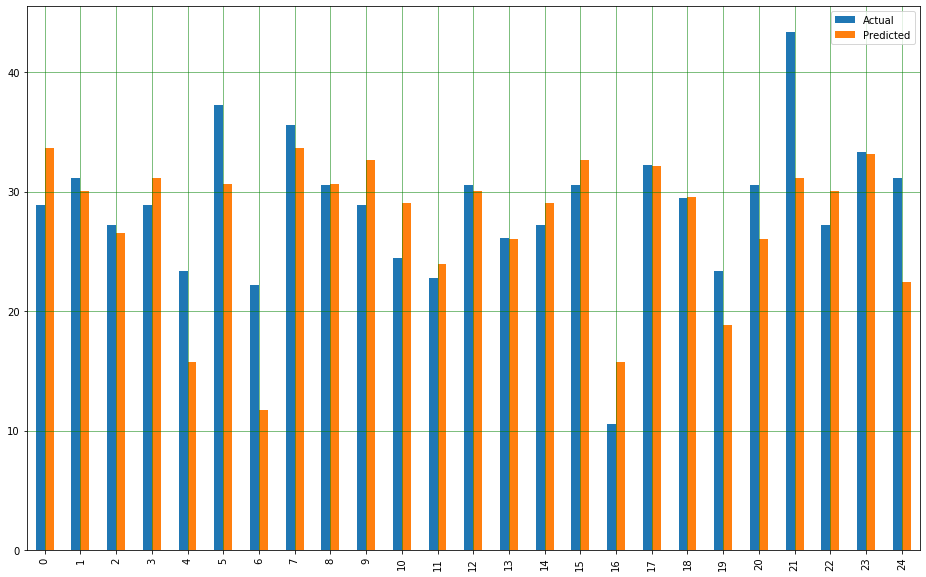

In [24]:
# Visualize Comparison:
# We can also visualize comparison result as a bar graph 
# using the below script :
# Note: As the number of records is huge, for representation 
# purpose I’m taking just 25 records.
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

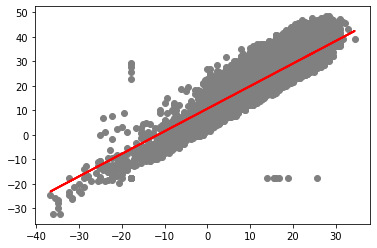

In [25]:
# Though our model is not very precise, 
# the predicted percentages are close to the actual ones.
# Let's plot our straight line with the test data :
plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

In [26]:
# Performance of Algorithm:

# The final step is to evaluate the 
# performance of the algorithm. This 
# step is particularly important to compare 
# how well different algorithms perform on a 
# particular dataset. For regression algorithms, 
# three evaluation metrics are commonly used:

# 1. Mean Absolute Error (MAE) 
#    is the mean of the absolute value of the errors. 
#    It is calculated as ...

# 2. Mean Squared Error (MSE) 
#    is the mean of the squared errors. 
#    It is calculated as ...

# 3. Root Mean Squared Error (RMSE) 
#    is the square root of the mean of the squared errors.
#    It is calculated as ...


In [27]:
# Luckily, we don’t have to perform these 
# calculations manually. The Scikit-Learn 
# library comes with pre-built functions 
# that can be used to find out these values for us.
# Let’s find the values for these metrics using our test data.
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', 
      metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', 
      np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 3.19932917837853
Mean Squared Error: 17.631568097568447
Root Mean Squared Error: 4.198996082109204


In [ ]:
# what these numbers mean???

# You can see that the value of root mean squared error is 4.19, 
# which is more than 10% of the mean value of the percentages 
# of all the temperature i.e. 22.41. This means that our algorithm 
# was not very accurate but can still make reasonably good predictions.